In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [ ]:
train_data=pd.read_csv("fraudTrain.csv")
test_data=pd.read_csv("fraudTest.csv")


In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
test_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
27230,27230,2020-06-30 08:20:10,180036456789979,"fraud_Streich, Hansen and Veum",gas_transport,73.12,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878.0,Risk analyst,1974-11-20,6f76444c6cc287ddb3407a485901e6bc,1.372580e+09,43.410199,-90.119977,0.0
27231,27231,2020-06-30 08:21:34,4707867759656333,fraud_Towne LLC,misc_pos,3.69,Susan,Shah,F,9016 Jordan Bypass Apt. 516,...,36.7558,-83.1838,581.0,"Psychologist, counselling",1967-02-04,6cba43ce85d06216328e01b37d97fb94,1.372580e+09,36.418842,-83.067039,0.0
27232,27232,2020-06-30 08:21:57,6526955903501879,fraud_Padberg-Welch,grocery_pos,84.05,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002.0,Medical technical officer,1950-12-14,31c792b9d6f21dc88147d7a7c7e0434f,1.372581e+09,25.873441,-81.589103,0.0
27233,27233,2020-06-30 08:22:09,5152054598359927,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,Jim,Johnson,M,868 Brady Mill Apt. 837,...,29.8872,-90.0331,55581.0,Biomedical scientist,1972-09-12,c71fb27609c52cc9147a98dce6b11806,1.372581e+09,30.430342,-90.735797,0.0
27234,27234,2020-06-30 08:23:48,38859492057661,fraud_Berge LLC,gas_transport,87.99,Edward,Sanchez,M,594 White Dale Suite 530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27259 entries, 0 to 27258
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27259 non-null  int64  
 1   trans_date_trans_time  27259 non-null  object 
 2   cc_num                 27259 non-null  int64  
 3   merchant               27259 non-null  object 
 4   category               27259 non-null  object 
 5   amt                    27259 non-null  float64
 6   first                  27259 non-null  object 
 7   last                   27259 non-null  object 
 8   gender                 27259 non-null  object 
 9   street                 27259 non-null  object 
 10  city                   27258 non-null  object 
 11  state                  27258 non-null  object 
 12  zip                    27258 non-null  float64
 13  lat                    27258 non-null  float64
 14  long                   27258 non-null  float64
 15  ci

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27235 entries, 0 to 27234
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27235 non-null  int64  
 1   trans_date_trans_time  27235 non-null  object 
 2   cc_num                 27235 non-null  int64  
 3   merchant               27235 non-null  object 
 4   category               27235 non-null  object 
 5   amt                    27235 non-null  float64
 6   first                  27235 non-null  object 
 7   last                   27235 non-null  object 
 8   gender                 27235 non-null  object 
 9   street                 27235 non-null  object 
 10  city                   27235 non-null  object 
 11  state                  27235 non-null  object 
 12  zip                    27235 non-null  int64  
 13  lat                    27234 non-null  float64
 14  long                   27234 non-null  float64
 15  ci

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27259.00000,2.725900e+04,27259.000000,27258.000000,27258.000000,27258.000000,2.725800e+04,2.725800e+04,27258.000000,27258.000000,27258.000000
mean,13629.00000,4.203488e+17,71.834406,48732.303581,38.525900,-90.224295,9.005962e+04,1.326075e+09,38.525442,-90.225811,0.009355
std,7869.13983,1.313623e+18,151.848187,26978.693903,5.097014,13.927149,2.988129e+05,3.959763e+05,5.124933,13.946210,0.096270
min,0.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,6814.50000,1.800462e+14,9.680000,25526.000000,34.690200,-96.809400,7.540000e+02,1.325766e+09,34.785420,-96.950790,0.000000
50%,13629.00000,3.519233e+15,47.890000,48088.000000,39.339100,-87.476900,2.501000e+03,1.326043e+09,39.334418,-87.430602,0.000000
75%,20443.50000,4.651007e+15,83.600000,72042.000000,41.846700,-80.124800,2.112500e+04,1.326453e+09,41.899086,-80.148617,0.000000
max,27258.00000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326730e+09,66.659242,-66.967742,1.000000


In [ ]:
train_data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
print(train_data['is_fraud'].value_counts())

is_fraud
0.0    27003
1.0      255
Name: count, dtype: int64


<ipython-input-10-367a8e2cdc2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")


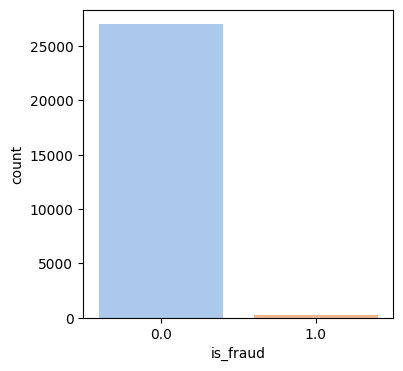

In [ ]:
plt.figure(figsize=(4,4))
fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")
plt.show(fg)

<ipython-input-11-9ad1e52d5835>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x='is_fraud',data=test_data,palette="pastel")


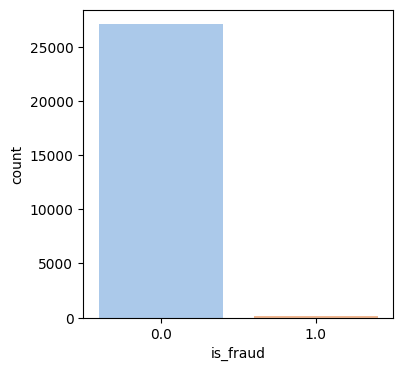

In [ ]:
plt.figure(figsize=(4,4))
fg=sns.countplot(x='is_fraud',data=test_data,palette="pastel")
plt.show(fg)

In [ ]:
train_data["trans_date_trans_time"]=pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"]=pd.to_datetime(train_data["dob"])
train_data


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27254,27254,2019-01-16 16:11:37,4878364946692291,fraud_Bauch-Raynor,grocery_pos,311.01,Tina,Alvarez,F,1976 Tyler Underpass,...,42.4483,-95.1726,885.0,"Pilot, airline",1949-08-14,95bae2e173f59aa359e59d50b85c81c6,1.326730e+09,42.088057,-95.207560,1.0
27255,27255,2019-01-16 16:11:38,180084695172649,fraud_Botsford and Sons,home,75.14,Holly,Mann,F,7644 Joseph Fields,...,39.3036,-89.2853,3458.0,Building surveyor,1985-12-08,31ff7fb365a6425ee51c35eb39e877d5,1.326730e+09,38.993834,-89.709933,0.0
27256,27256,2019-01-16 16:11:59,38057513087029,fraud_Kozey-Kuhlman,personal_care,21.29,Marissa,Clark,F,2677 Byrd Village Suite 035,...,37.3304,-121.7913,973849.0,Geoscientist,1997-01-18,bf495ee334f318f18552e16a9c750ae6,1.326730e+09,37.871844,-122.029575,0.0
27257,27257,2019-01-16 16:12:26,180084576295055,fraud_Windler LLC,kids_pets,40.45,David,Kirby,M,133 Alyssa Plains,...,28.7724,-96.4793,911.0,Archaeologist,1970-01-18,8c7acaafddc3b450418ecaa467f30cc5,1.326730e+09,28.964929,-97.250660,0.0


In [ ]:
test_data["trans_date_trans_time"]=pd.to_datetime(test_data["trans_date_trans_time"])
test_data["dob"]=pd.to_datetime(test_data["dob"])
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27230,27230,2020-06-30 08:20:10,180036456789979,"fraud_Streich, Hansen and Veum",gas_transport,73.12,Mackenzie,Salazar,F,982 Melissa Lock,...,42.9207,-91.0685,878.0,Risk analyst,1974-11-20,6f76444c6cc287ddb3407a485901e6bc,1.372580e+09,43.410199,-90.119977,0.0
27231,27231,2020-06-30 08:21:34,4707867759656333,fraud_Towne LLC,misc_pos,3.69,Susan,Shah,F,9016 Jordan Bypass Apt. 516,...,36.7558,-83.1838,581.0,"Psychologist, counselling",1967-02-04,6cba43ce85d06216328e01b37d97fb94,1.372580e+09,36.418842,-83.067039,0.0
27232,27232,2020-06-30 08:21:57,6526955903501879,fraud_Padberg-Welch,grocery_pos,84.05,Jennifer,Scott,F,7351 Cindy Well Suite 099,...,26.3304,-81.5871,276002.0,Medical technical officer,1950-12-14,31c792b9d6f21dc88147d7a7c7e0434f,1.372581e+09,25.873441,-81.589103,0.0
27233,27233,2020-06-30 08:22:09,5152054598359927,"fraud_Mosciski, Gislason and Mertz",grocery_pos,74.56,Jim,Johnson,M,868 Brady Mill Apt. 837,...,29.8872,-90.0331,55581.0,Biomedical scientist,1972-09-12,c71fb27609c52cc9147a98dce6b11806,1.372581e+09,30.430342,-90.735797,0.0


In [ ]:
#drop columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','trans_num','unix_time',
               'first','last','street','zip','trans_date_trans_time','city',
               'lat','long','dob','merch_lat','merch_long','state']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

print(train_data)
train_data.shape

print(test_data.head(5))
test_data.shape

                                 merchant       category     amt gender  \
0              fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1         fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                    fraud_Lind-Buckridge  entertainment  220.11      M   
3      fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                     fraud_Keeling-Crist       misc_pos   41.96      M   
...                                   ...            ...     ...    ...   
27254                  fraud_Bauch-Raynor    grocery_pos  311.01      F   
27255             fraud_Botsford and Sons           home   75.14      F   
27256                 fraud_Kozey-Kuhlman  personal_care   21.29      F   
27257                   fraud_Windler LLC      kids_pets   40.45      M   
27258                 fraud_Gibson-Deckow  entertainment   67.13      M   

       city_pop                                job  is_fraud  
0        3495.0          Psychologis

(27235, 7)

In [ ]:
encoder = LabelEncoder()
train_data["gender"]=encoder.fit_transform(train_data["gender"])
test_data["gender"]=encoder.fit_transform(test_data["gender"])

train_data["category"]=encoder.fit_transform(train_data["category"])
test_data["category"]=encoder.fit_transform(test_data["category"])

train_data["job"]=encoder.fit_transform(train_data["job"])
test_data["job"]=encoder.fit_transform(test_data["job"])

train_data["merchant"]=encoder.fit_transform(train_data["merchant"])
test_data["merchant"]=encoder.fit_transform(test_data["merchant"])

train_data['amt'] = train_data['amt'].astype(int)

train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)
test_data.fillna(-999,inplace=True)
test_data.fillna(-999,inplace=True)

train_data = train_data[train_data != -999].dropna()

# Drop rows containing -999 in test_data
test_data = test_data[test_data != -999].dropna()

In [ ]:
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test=test_data.drop('is_fraud',axis=1)
y_test = test_data['is_fraud']

In [ ]:
train_data.head()

,merchant,category,amt,gender,city_pop,job,is_fraud
0,514,8,4,0,3495.0,356,0.0
1,241,4,107,0,149.0,411,0.0
2,390,0,220,1,4154.0,294,0.0
3,360,2,45,1,1939.0,315,0.0
4,297,9,41,1,99.0,110,0.0


In [ ]:
test_data.tail()

,merchant,category,amt,gender,city_pop,job,is_fraud
27229,486,11,99.38,1,828.0,37,0.0
27230,605,2,73.12,0,878.0,387,0.0
27231,629,9,3.69,0,581.0,356,0.0
27232,472,4,84.05,0,276002.0,280,0.0
27233,442,4,74.56,1,55581.0,45,0.0


<ipython-input-22-27352949cbb2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_fraud", data=train_data, palette="Set2")


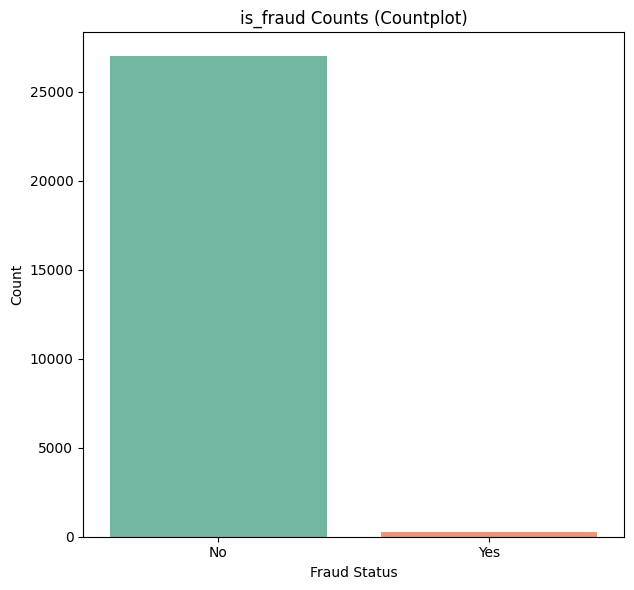

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.countplot(x="is_fraud", data=train_data, palette="Set2")

plt.title("is_fraud Counts (Countplot)")
plt.xlabel("Fraud Status")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])


plt.tight_layout()
plt.show()


In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

merchant      int64
category      int64
amt           int64
gender        int64
city_pop    float64
job           int64
dtype: object
float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(random_state=42)
classification.fit(x_train,y_train)

y_pred=classification.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9936476463244474
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27118
         1.0       0.32      0.43      0.37       116

    accuracy                           0.99     27234
   macro avg       0.66      0.71      0.68     27234
weighted avg       0.99      0.99      0.99     27234



In [ ]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100,random_state=42)
cla.fit(x_train,y_train)

y_pred=cla.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9963648380700595
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27118
         1.0       0.66      0.30      0.41       116

    accuracy                           1.00     27234
   macro avg       0.83      0.65      0.71     27234
weighted avg       1.00      1.00      1.00     27234



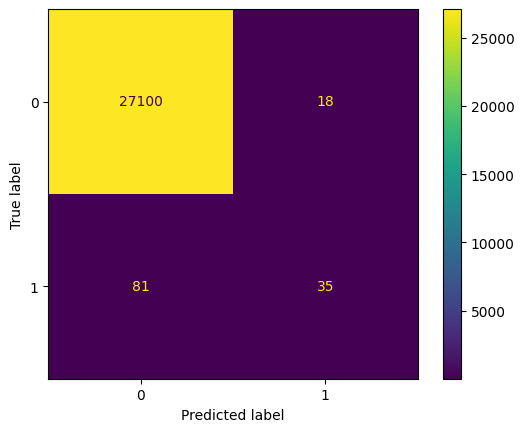

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()